In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [47]:
train_data = pd.read_csv("train_data_1.csv")
test_data=pd.read_csv("test.csv")

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              39499 non-null  int64  
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       39499 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  39499 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

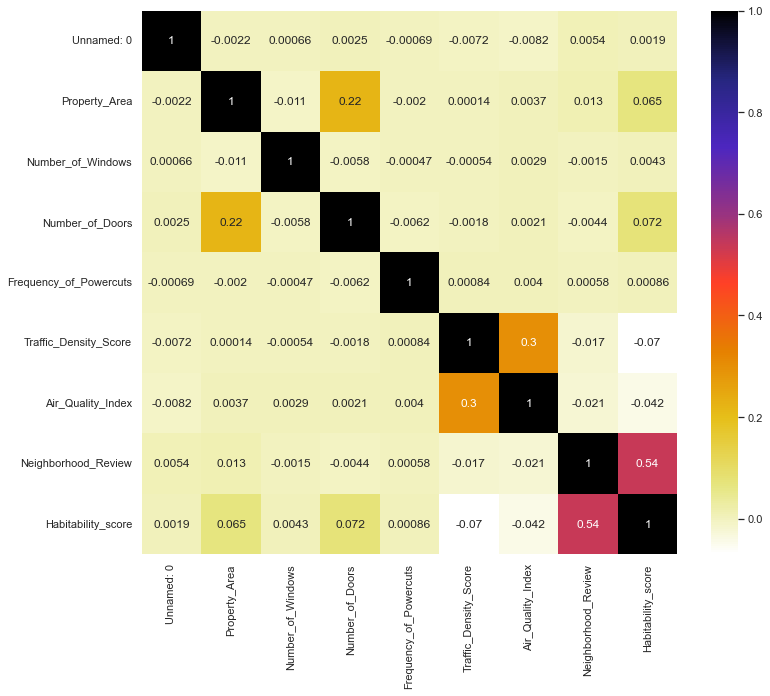

In [49]:
plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [50]:
train_data.drop('Unnamed: 0',axis=1, inplace=True)

In [51]:
train_data=train_data.dropna()

In [52]:
train_data

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,2.000000,1,Semi_Furnished,0.000000,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,Apartment,733,4.000000,2,Unfurnished,1.000000,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,3.000000,2,Fully Furnished,0.000000,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,Apartment,900,14.000000,2,Unfurnished,2.000000,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,Bungalow,2238,3.000000,6,Fully Furnished,0.000000,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39492,Bungalow,3317,5.487018,4,Fully Furnished,0.253922,No,All time,4.05,Slightly above average,Medium,101.0,2.29,78.75
39493,Apartment,276,3.516948,3,Semi_Furnished,-0.102824,No,NOT MENTIONED,4.47,Well below average,Medium,81.0,4.20,73.61
39495,Apartment,445,2.492152,3,Fully Furnished,-0.063805,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39496,Bungalow,3780,2.492039,6,Unfurnished,0.777892,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80,81.44


In [53]:
train_data= pd.get_dummies(train_data, columns = ['Property_Type', 'Furnishing','Power_Backup','Water_Supply','Crime_Rate','Dust_and_Noise'])


In [54]:
train_data.shape

(36521, 32)

In [55]:
x=train_data.drop('Habitability_score', axis=1)

In [56]:
x

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,106,2.000000,1,0.000000,5.89,90.0,3.86,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,733,4.000000,2,1.000000,4.37,96.0,3.55,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,737,3.000000,2,0.000000,7.45,121.0,3.81,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,900,14.000000,2,2.000000,6.16,100.0,1.34,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,2238,3.000000,6,0.000000,5.46,116.0,4.77,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39492,3317,5.487018,4,0.253922,4.05,101.0,2.29,0,0,1,...,0,0,0,1,0,0,0,0,0,1
39493,276,3.516948,3,-0.102824,4.47,81.0,4.20,0,1,0,...,0,0,0,0,0,0,1,0,0,1
39495,445,2.492152,3,-0.063805,5.70,86.0,2.93,0,1,0,...,0,0,0,1,0,0,0,0,0,1
39496,3780,2.492039,6,0.777892,6.84,137.0,3.80,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [57]:
y=train_data['Habitability_score']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
y_pred=lr.predict(x_test)

In [61]:
lr.score(x_train, y_train)

0.5997830483862246

In [62]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
y_pred=reg.predict(x_test)
reg.score(x_train, y_train)

0.9761179445488721

In [64]:
y_pred

array([83.6138, 72.5126, 68.649 , ..., 74.2038, 82.9719, 70.1911])

In [65]:
y_test=y_test.reset_index(drop = True)

In [66]:
y_pred = pd.DataFrame(y_pred)   

In [67]:
y_pred

,0
0,83.6138
1,72.5126
2,68.6490
3,80.6853
4,76.2914
...,...
10952,81.3533
10953,83.2674
10954,74.2038
10955,82.9719


In [68]:
y_test = pd.DataFrame(y_test)  

In [69]:
y_test

,Habitability_score
0,75.13
1,72.81
2,60.59
3,93.41
4,76.11
...,...
10952,72.74
10953,76.52
10954,69.54
10955,78.57


In [84]:
reg.score(x_test,y_test)

0.8269971459131267

In [85]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred1 = ridgeR.predict(x_test)

In [86]:
ridgeR.score(x_test,y_test)

0.5917378791395838

In [87]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred2 = lasso.predict(x_test)
lasso.score(x_test,y_test)

0.48127068649244087

In [88]:
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
y_pred3=e_net.predict(x_test)
e_net.score(x_test,y_test)

0.357503558621486